In [10]:
import fly_plot_lib.plot as fpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import figurefirst as fifi
from scipy import stats
#import statsmodels.api as sm

In [2]:
#helper function for slicing means with standard errors
def slice_means_gs(df, index, time_key= "time stamp", start=-100, stop=3000):
    time_vec=[]
    mean_vec=[]
    upper_vec =[]
    lower_vec =[]
    df=df[df[time_key].between(start, stop)]
    for i in df[time_key].unique():
        dummy_df =df[df[time_key]==i]
        dummy_df=dummy_df[dummy_df['ground speed'].between(0, 2.0)]
        time_vec.append(i)
        mean = dummy_df[index].mean()
        upper= dummy_df[index].mean() + dummy_df[index].sem()*1.96
        lower= dummy_df[index].mean() - dummy_df[index].sem()*1.96
        mean_vec.append(mean)
        upper_vec.append(upper)
        lower_vec.append(lower)
    return time_vec, mean_vec, upper_vec, lower_vec

In [3]:
#proportion of trajectories at a given orientaion
def slice_head_prop(df, index='heading', time_key= "time stamp", start=-90, stop=3000):
    time_vec=[]
    uw_vec =[]
    cw_vec =[]
    dw_vec =[]
    df=df[df[time_key].between(start, stop)]
    for i in df[time_key].unique():
        dummy_df =df[df[time_key]==i]
        dummy_df=dummy_df[dummy_df['ground speed'].between(0, 2.0)]
        time_vec.append(i)
        tot =float(len(dummy_df))
        dummy_df['abs head'] =np.abs(dummy_df[index])
        #df[df < 2.0 ].count() 
        uw = dummy_df[dummy_df['abs head']<np.pi/4.].count()
        cw =dummy_df[dummy_df['abs head'].between(np.pi/4., 3.*np.pi/4)].count()
        dw =dummy_df[dummy_df['abs head']>3*np.pi/4.].count()
        uw_vec.append(uw/tot)
        cw_vec.append(cw/tot)
        dw_vec.append(dw/tot)
    return time_vec, uw_vec, cw_vec, dw_vec
    

In [4]:

orco= pd.read_csv('../trimmed_data/main/Orco_CsChrimson_still_air_merged.csv')
orco100=orco[orco['duration']==100]
orco0=orco[orco['duration']==0]

In [11]:
wt = pd.read_csv('../trimmed_data/main/wildtype_still_air_merged.csv')
wt100= wt[wt['duration']==100]
wt0=wt[wt['duration']==0]

In [16]:
orco100['ground speed']=(orco100['xvel']**2+orco100['yvel']**2)**0.5
orco0['ground speed']=(orco0['xvel']**2+orco0['yvel']**2)**0.5
wt100['ground speed']=(wt100['xvel']**2+wt100['yvel']**2)**0.5
wt0['ground speed']=(wt0['xvel']**2+wt0['yvel']**2)**0.5


In [8]:
ms =4
lw= .5
fs =6

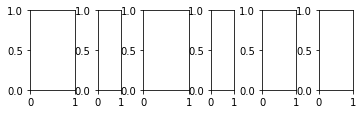

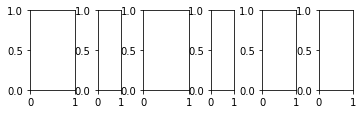

In [4]:
template = '../figure_first_templates/still_air_with_control.svg'
layout =fifi.svg_to_axes.FigureLayout(template, autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [49]:
ax=layout.axes[('orco', 'hm_f')]

In [50]:
cmap_reversed = plt.cm.get_cmap('bone_r')
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_xlim(-3.2, 3.2)
a = np.arange(-100,3000,10)
b = np.linspace(-np.pi, np.pi, 180)
x = np.arange(-100,3010, 10)
y = np.linspace(-np.pi, np.pi, 181)
bin_values,_,__ = np.histogram2d(orco100['time stamp'], orco100['heading'],  bins =(x, y))

newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
sumz = newdf.sum(axis=0)

newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/sumz.iloc[i]
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(Y, X, newdf_normed, vmin=0, vmax=0.04, cmap='bone_r', shading='flat', rasterized=True)
ax.set_xticklabels([r'-$\pi$', r'-$\pi/2$', '0',r'$\pi/2$', r'$\pi$' ])

ax.set_yticklabels([])

fifi.mpl_functions.adjust_spines(ax, ['left','bottom'], xticks =[-3.14, -3.14/2, 0, 3.14/2, 3.14], yticks=[0, 675, 3000],  tick_length=3, linewidth=.5)
fifi.mpl_functions.set_fontsize(ax, fs)

In [51]:
ax=layout.axes[('wt', 'hm_f')]

In [52]:
cmap_reversed = plt.cm.get_cmap('bone_r')
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_xlim(-3.2, 3.2)
a = np.arange(-100,3000,10)
b = np.linspace(-np.pi, np.pi, 180)
x = np.arange(-100,3010, 10)
y = np.linspace(-np.pi, np.pi, 181)
bin_values,_,__ = np.histogram2d(wt100['time stamp'], wt100['heading'],  bins =(x, y))

newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
sumz = newdf.sum(axis=0)

newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/sumz.iloc[i]
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(Y, X, newdf_normed, vmin=0, vmax=0.04, cmap='bone_r', shading='flat', rasterized=True)
ax.set_xticklabels([r'-$\pi$', r'-$\pi/2$', '0',r'$\pi/2$', r'$\pi$' ])

ax.set_yticklabels([])

fifi.mpl_functions.adjust_spines(ax, ['left','bottom'], xticks =[-3.14, -3.14/2, 0, 3.14/2, 3.14], yticks=[0, 675, 3000],  tick_length=3, linewidth=.5)
fifi.mpl_functions.set_fontsize(ax, fs)

In [53]:
ax=layout.axes[('orco', 'hm_s')]

In [54]:
cmap_reversed = plt.cm.get_cmap('bone_r')
#ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_xlim(-3.2, 3.2)
a = np.arange(-100,3000,10)
b = np.linspace(-np.pi, np.pi, 180)
x = np.arange(-100,3010, 10)
y = np.linspace(-np.pi, np.pi, 181)
bin_values,_,__ = np.histogram2d(orco0['time stamp'], orco0['heading'],  bins =(x, y))

newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
sumz = newdf.sum(axis=0)

newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/sumz.iloc[i]
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(Y, X, newdf_normed, vmin=0, vmax=0.04, cmap='bone_r', shading='flat', rasterized=True)


ax.set_xticklabels([])
ax.set_yticklabels([])

fifi.mpl_functions.adjust_spines(ax, ['left','bottom'], xticks =[-3.14, -3.14/2, 0, 3.14/2, 3.14], yticks=[0, 675, 3000],  tick_length=3, linewidth=.5)
fifi.mpl_functions.set_fontsize(ax, fs)

In [55]:
ax=layout.axes[('wt', 'hm_s')]

In [56]:
cmap_reversed = plt.cm.get_cmap('bone_r')
#ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_xlim(-3.2, 3.2)
a = np.arange(-100,3000,10)
b = np.linspace(-np.pi, np.pi, 180)
x = np.arange(-100,3010, 10)
y = np.linspace(-np.pi, np.pi, 181)
bin_values,_,__ = np.histogram2d(wt0['time stamp'], wt0['heading'],  bins =(x, y))

newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
sumz = newdf.sum(axis=0)

newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/sumz.iloc[i]
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(Y, X, newdf_normed, vmin=0, vmax=0.04, cmap='bone_r', shading='flat', rasterized=True)


ax.set_xticklabels([])
ax.set_yticklabels([])

fifi.mpl_functions.adjust_spines(ax, ['left','bottom'], xticks =[-3.14, -3.14/2, 0, 3.14/2, 3.14], yticks=[0, 675, 3000],  tick_length=3, linewidth=.5)
fifi.mpl_functions.set_fontsize(ax, fs)

In [57]:
ax=layout.axes[('orco', 'gs')]

In [58]:
#Grab population mean and error boundaries for both flash and sham subsets for orco flies
t, m, u, l= slice_means_gs(orco100, 'ground speed')
t0, m0, u0, l0=slice_means_gs(orco0, 'ground speed')

In [59]:
ax.plot(m, t, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(m0, t0, color ='k', label = 'Control', linewidth=.5)

ax.fill_betweenx(t0, u0, l0, color = 'k', alpha = 0.2, label = '', linewidth =0)

ax.fill_betweenx(t, u, l, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, .6], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [60]:
ax=layout.axes[('wt', 'gs')]

In [61]:
#Grab population mean and error boundaries for both flash and sham subsets for wtflies
t, m, u, l= slice_means_gs(wt100, 'ground speed')
t0, m0, u0, l0=slice_means_gs(wt0, 'ground speed')

In [62]:
ax.plot(m, t, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(m0, t0, color ='k', label = 'Control', linewidth=.5)

ax.fill_betweenx(t0, u0, l0, color = 'k', alpha = 0.2, label = '', linewidth =0)

ax.fill_betweenx(t, u, l, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, .6], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [63]:
ax=layout.axes[('orco', 'alt')]

In [64]:
#Grab population mean and error boundaries for both flash and sham subsets for orco flies
t, m, u, l= slice_means_gs(orco100, 'z')
t0, m0, u0, l0=slice_means_gs(orco0, 'z')

In [65]:
ax.plot(m, t, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(m0, t0, color ='k', label = 'Control', linewidth=.5)
#ax.set_ylabel("Ground Speed (m/s)")
ax.fill_betweenx(t0, u0, l0, color = 'k', alpha = 0.2, label = '', linewidth =0)
ax.fill_betweenx(t, u, l, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, .5], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [66]:
ax=layout.axes[('wt', 'alt')]

In [67]:
#Grab population mean and error boundaries for both flash and sham subsets for orco flies
t, m, u, l= slice_means_gs(wt100, 'z')
t0, m0, u0, l0=slice_means_gs(wt0, 'z')

In [68]:
ax.plot(m, t, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(m0, t0, color ='k', label = 'Control', linewidth=.5)
#ax.set_ylabel("Ground Speed (m/s)")
ax.fill_betweenx(t0, u0, l0, color = 'k', alpha = 0.2, label = '', linewidth =0)
ax.fill_betweenx(t, u, l, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, .5], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [69]:
ax=layout.axes[('orco', 'prop_f')]

In [70]:
t, uw, cw, dw= slice_head_prop(orco100)

In [71]:
ax.plot(uw, t, color = 'green', linewidth =.5)
ax.plot(cw, t, color ='blue', linewidth=.5)
ax.plot(dw, t, color = 'orange', linewidth =.5)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['bottom'],xticks=[0, 1.0], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [72]:
ax=layout.axes[('wt', 'prop_f')]

In [73]:
t, uw, cw, dw= slice_head_prop(wt100)

In [74]:
ax.plot(uw, t, color = 'green', linewidth =.5)
ax.plot(cw, t, color ='blue', linewidth=.5)
ax.plot(dw, t, color = 'orange', linewidth =.5)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['bottom'],xticks=[0, 1.0], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [75]:
ax=layout.axes[('orco', 'prop_s')]

In [76]:
t0, uw0, cw0, dw0= slice_head_prop(orco0)

In [77]:
ax.plot(uw0, t0, color = 'green', linewidth =.5)
ax.plot(cw0, t0, color ='blue', linewidth=.5)
ax.plot(dw0, t0, color = 'orange', linewidth =.5)
ax.set_ylim(-100, 3000)
#ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['bottom'],xticks=[0, 1.0], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [78]:
ax=layout.axes[('wt', 'prop_s')]

In [79]:
t0, uw0, cw0, dw0= slice_head_prop(wt0)

In [80]:
ax.plot(uw0, t0, color = 'green', linewidth =.5)
ax.plot(cw0, t0, color ='blue', linewidth=.5)
ax.plot(dw0, t0, color = 'orange', linewidth =.5)
ax.set_ylim(-100, 3000)
#ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['bottom'],xticks=[0, 1.0], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


# FigureFirst saving function

In [81]:
layout.append_figure_to_layer(layout.figures['orco'], 'orco', cleartarget=True)
layout.append_figure_to_layer(layout.figures['wt'], 'wt', cleartarget=True)
layout.write_svg(template)